# Installing Qiskit

In [1]:
# Install and Import Qiskit using pip, if it's not installed
try:
    import qiskit
except:
    ! pip install qiskit
    import qiskit

# Initializing an Empty Program for 1 Qubit

In [2]:
# Initializing an empty program for 1 qubit and measuring it's value
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
program = qiskit.QuantumCircuit(qr, cr)
program.measure(qr,cr)

# Executing program on Quantum Simulator

In [3]:
'''
This will execute the program on a quantum simulator (qasm) provided by IBM 
Since qubit is initialized as '0', and we are just measuring it's value, 1024 times (default shots) we will only get '0' 
'''
job = qiskit.execute(program, qiskit.BasicAer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'0': 1024}


# Executing program on actual Quantum Computer

Steps to get API token:
* Go to https://quantum-computing.ibm.com/
* Sign Up/ Sign in your account
* Go to right most icon on the top of the page and click on 'My Account'
* Click on Copy Token and paste it in the code given in next cell block

In [4]:
# Save your account to disk for future use by passing API Token generated in your IBM cloud account
qiskit.IBMQ.save_account('Your API Token')

Credentials already present. Set overwrite=True to overwrite.


In [5]:
# Load your account and list all providers
providers = qiskit.IBMQ.load_account()
providers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
#Find the device which is least busy
backend = qiskit.providers.ibmq.least_busy(providers.backends(simulator=False))
print("We'll use the least busy device:",backend.name())

We'll use the least busy device: ibmq_armonk


In [7]:
'''
This will execute the program on least busy quantum device i.e., 'ibmq_armonk' for now 
Since qubit is initialized as '0', and we are just measuring it's value, 
1024 times (default shots) we will get most of the samples as '0', with few samples as '1' because of noise
'''
job = qiskit.execute(program, backend )
print( job.result().get_counts() )

{'0': 993, '1': 31}


# Let's create Entanglement

In [8]:
backend = providers.backends(simulator=False)[-2]
print("Backend used is " + backend.name())

# Initialize two qubits and create Entanglement using Hadamard and CX/CNOT Gate
q = qiskit.QuantumRegister(2)
c = qiskit.ClassicalRegister(2)
qc = qiskit.QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
job_exp = qiskit.execute(qc, backend=backend, shots=1024, max_credits=3)

Backend used is ibmq_essex


In [9]:
# Circuit which we composed above
qc.draw()

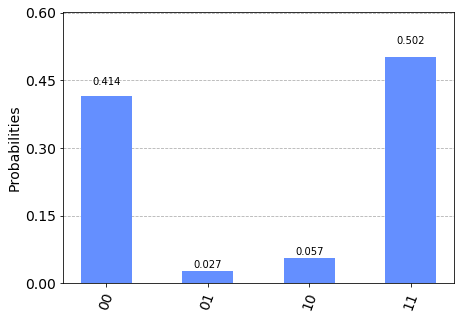

In [10]:
# Executing the job created above for entanglement and plotting the result in histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(job_exp.result().get_counts(qc))

In [11]:
print('Congrats! We have made entanglement')

Congrats! We have made entanglement
